# PART TWO

In [2]:
#import libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import chart_studio.plotly as py
import plotly
import sys
sys.path.append('./')
from config import username, pwd


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [3]:
py.sign_in(username, pwd)

In [4]:
wine_data = pd.read_csv('Wine_data.csv')
wine_data = wine_data.drop(columns=['Unnamed: 0'],axis=1)
wine_data.head(20)

,Country,Title,Points,Price,Province,Region,Taster Name,Twitter Handle,Description,Variety,Winery,Year,Location,Latitude,Longitude,Category
0,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013,"Sicily & Sardinia,Italy",37.6,14.0,Red
1,Italy,Delicate aromas recall white flower and citrus...,87,19.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,2007,"Sicily & Sardinia,Italy",37.6,14.0,White
2,Italy,"Aromas of prune, blackcurrant, toast and oak c...",87,35.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,2009,"Sicily & Sardinia,Italy",37.6,14.0,Red
3,Italy,Pretty aromas of yellow flower and stone fruit...,87,13.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,2013,"Sicily & Sardinia,Italy",37.6,14.0,White
4,Italy,"Aromas recall ripe dark berry, toast and a whi...",87,10.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,2013,"Sicily & Sardinia,Italy",37.6,14.0,Red
5,Italy,"Aromas suggest mature berry, scorched earth, a...",87,17.0,Sicily & Sardinia,Cerasuolo di Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo,2011,"Sicily & Sardinia,Italy",37.6,14.0,Red
6,Italy,This concentrated Cabernet offers aromas of cu...,86,21.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,2010,"Sicily & Sardinia,Italy",37.6,14.0,Red
7,Italy,"Part of the natural wine movement, this wine i...",86,12.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudo di Santa Tresa 2011 Purato Made With Org...,Nero d'Avola,Feudo di Santa Tresa,2011,"Sicily & Sardinia,Italy",37.6,14.0,Red
8,Italy,Catarratto is one of Sicily's most widely farm...,86,17.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudo Montoni 2011 Catarratto (Sicilia),Catarratto,Feudo Montoni,2011,"Sicily & Sardinia,Italy",37.6,14.0,White
9,Italy,"Spicy, fresh and clean, this would pair with f...",86,13.0,Sicily & Sardinia,Sicilia,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Inzol...,Inzolia,Tasca d'Almerita,2011,"Sicily & Sardinia,Italy",37.6,14.0,White


# Identify the Master sommelier in our dataset

In [5]:
#Identify the taster of the wine 
tasters = wine_data.groupby(['Taster Name']).count()['Variety']
tasters = tasters.reset_index().sort_values('Variety', ascending=False)
tasters

,Taster Name,Variety
15,Roger Voss,18262
12,Michael Schachner,14306
18,Virginie Boone,9402
14,Paul Gregutt,9383
9,Kerin O’Keefe,8990
11,Matt Kettmann,6204
16,Sean P. Sullivan,4873
8,Joe Czerwinski,4863
1,Anna Lee C. Iijima,4013
7,Jim Gordon,4011


# Distribution of Wine Prices

In [6]:
# we want to see the cheapeast wine, the average price and the most expensive wine
minimum_price = wine_data['Price'].min()
print(minimum_price)
maximum_price = wine_data['Price'].max()
print(maximum_price)
average_price = round(wine_data['Price'].mean(),2)
print(average_price)

4.0
3300.0
35.64


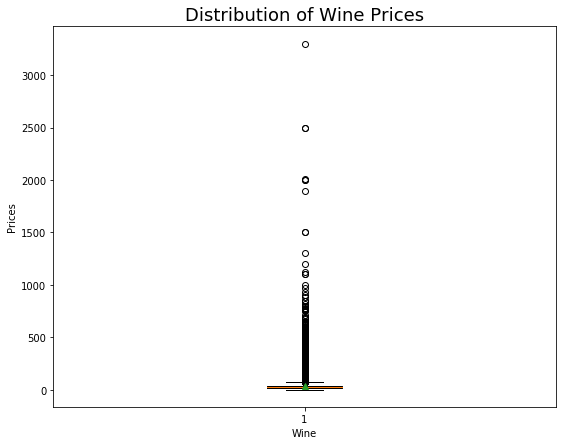

In [7]:
# create a visualization to see the range of wine prices
fig, ax = plt.subplots(figsize=(9, 7))
plt.boxplot(wine_data['Price'], showmeans=True)
plt.title('Distribution of Wine Prices', fontsize=18)
plt.xlabel('Wine')
plt.ylabel('Prices')
plt.show()

# Correlation Matrix

In [8]:
# single out the most expensive wine
expensive_wine = wine_data[(wine_data['Price'] >= 3300)]
expensive_wine

,Country,Title,Points,Price,Province,Region,Taster Name,Twitter Handle,Description,Variety,Winery,Year,Location,Latitude,Longitude,Category
59463,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Médoc,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,2013,"Bordeaux,France",44.8,-0.6,Red


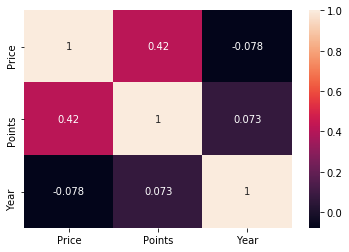

In [9]:
# Create a corr matrix to see if there is any correlation between the numeric values in the df
df = wine_data[['Price','Points','Year']]
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:

plt.savefig('corrMatrix.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

<Figure size 432x288 with 0 Axes>

# Compare Average Wine Prices By Grade of Wine


In [11]:
#Create a groupby object to aggregate grade of wine vs price of wine
grade_price = wine_data.groupby(['Points']).mean()['Price']
grade_price = grade_price.reset_index()

grade_price = round(grade_price,1)


In [12]:
# plot wine prices vs year produced
import plotly.express as px
data = grade_price
fig = px.bar(data, x='Points', y='Price', hover_data =['Points', 'Price'], color='Price',
             labels ={'Price':'Wine Price($)'},
             title='Average Wine Prices By Grade(World)')


py.iplot(fig, filename='Average Wine Prices By Grade')

In [14]:
fig.write_image("./css/grade_price.jpeg")

# Compare Average Wine Prices by Year 

In [13]:
#Create a groupby object to aggregate year produced vs price of wine
year_price = wine_data.groupby(['Year']).mean()['Price']
year_price = year_price.reset_index()

In [15]:
year_price = round(year_price,1)

# plot wine prices vs year produced
import plotly.express as px
data = year_price
fig = px.bar(data, x='Year', y='Price', hover_data =['Year', 'Price'], color='Price',
             labels ={'Price':'Wine Price($)'},
             title='Average Wine Prices By Year (World)')

py.iplot(fig, filename='Average Wine Prices By Year Produced')

In [16]:
fig.write_image("./css/year_price.jpeg")

# Compare Average Wine Prices By Country of Origin

In [17]:
#Compare wine prices to the country of origin
country_price = wine_data.groupby(['Country']).mean()['Price']
country_price = country_price.sort_values()
df = country_price.reset_index()


In [ ]:
df = round(df,1)

# Plot this wine prices vs country of origin
# we want text label to have the same size, text appear outside of chart
fig = px.bar(df, y='Price', x='Country', text='Price',
             title='Average Wine Prices By Country(World)')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


py.iplot(fig, filename='Average Wine Prices By Country Of Origin')

In [ ]:
fig.write_image("./css/country_price.jpeg")

# Number of Wineries Per Country

In [ ]:
abbrv = ['ARG','AUS','AUT','BUL','CAN','CHL','HRV','GBR','FRA','GEO','DEU','GRC','HUN','ISR','ITA',\
         'MEX','MDA','NZL','PRT','ROU','SVN','ZAF','ESP','TUR','USA','URY']
            
#abbrv

In [ ]:
# Make sure wineries are counted only once to avoid duplicate counts
no_dups = wine_data.drop_duplicates(subset = ['Winery'])

#Group the dataframe by Winery, lat , lng and location
world = no_dups.groupby(['Country']).count()['Winery']
world = world.reset_index()
world.columns = ['Country','Number of Wineries']

#Create a list called country code
abbrv = ['ARG','AUS','AUT','BUL','CAN','CHL','HRV','GBR','FRA','GEO','DEU','GRC','HUN','ISR','ITA',\
         'MEX','MDA','NZL','PRT','ROU','SVN','ZAF','ESP','TUR','USA','URY']
            
abbrv
#Add abbrreviation to existing dataframe
world['Country Code'] = abbrv
world

In [ ]:

fig = px.choropleth(world, locations="Country Code",
                    color="Number of Wineries", 
                    hover_name="Country",
                    projection="natural earth",
                    title="Number of Wineries By Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

py.iplot(fig, filename='Number of Wineries By Country')
#fig.show()

In [ ]:
fig.write_image("./css/num_wineries.jpeg")

# Analysis based on the USA

In [ ]:
#Focus on the united states and see which states has the most expensive wines on average
usa_only = wine_data.loc[wine_data['Country']== 'US']
usa_only = usa_only.reset_index()

# Drop column called index
usa_only = usa_only.drop('index', axis=1)

In [ ]:
# drop strange state column called 'America'
index_names =  usa_only[(usa_only['Province'] == 'America')].index
usa_only.drop(index_names, inplace = True) 

# Average Wine Price by Wine Grade (USA)

In [ ]:
# Compare wine prices by grade
grade_price = usa_only.groupby(['Points']).mean()['Price']
grade_price = grade_price.reset_index()
grade_price = round(grade_price,1)

# Plot wine prices vs year produced (USA)
import plotly.express as px
data = grade_price
fig = px.bar(data, x='Points', y='Price', hover_data =['Points', 'Price'], color='Price',
             labels ={'Price':'Wine Price($)'},
             title='Wine Prices By Grade(USA)')


py.iplot(fig, filename='Average Wine Prices By Grade(USA)')

In [ ]:
fig.write_image("./css/grade_price_usa.jpeg")

# Average Wine Prices by Year (USA)

In [ ]:
# Compare wine prices by year produced
year_price = usa_only.groupby(['Year']).mean()['Price']
year_price = year_price.reset_index()
year_price = round(year_price,1)

# Plot wine prices vs year produced (USA)
import plotly.express as px
data = year_price
fig = px.bar(data, x='Year', y='Price', hover_data =['Year', 'Price'], color='Price',
             labels ={'Price':'Wine Price($)'},
             title='Wine Prices By Year(USA)')

py.iplot(fig, filename='Average Wine Prices By Year(USA)')

In [ ]:
fig.write_image("./css/year_price_usa.jpeg")

# Average Wine Prices by State (USA)

In [ ]:
#Plot wine data by price of wines produced in the United States
state_price = usa_only.groupby(['Province']).mean()['Price']
state_price = state_price.reset_index()
state_price = state_price.sort_values('Price')
state_price = round(state_price,1)
state_price.columns= ['State','Wine Prices']

#Group data by State and Price
fig = px.bar(state_price, y='Wine Prices', x ='State', text='Wine Prices', 
             title=' Average Wine Prices By State(USA)')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8 )


py.iplot(fig, filename='Average Wine Prices By State(USA)')

In [ ]:
fig.write_image("./css/state_price_usa.jpeg")

In [ ]:
# State and number of wineries
usa_only['Winery'].value_counts()

In [ ]:
#drop duplicates values in Winery, we only want the name of a winery to appear once
non_dups = usa_only.drop_duplicates(subset = ['Winery'])

#Group the dataframe by Winery, lat , lng and location
usa = non_dups.groupby(['Latitude','Longitude','Province']).count()['Winery']
usa = usa.reset_index()
usa

In [ ]:
# Plot sum of unique wineries by state in The USA
import plotly.graph_objects as go

usa['text'] = usa['Province'] + '<br>' + 'Number of Wineries: ' + usa['Winery'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = usa['Longitude'],
        lat = usa['Latitude'],
        text = usa['text'],
        mode = 'markers',
        marker = dict(
            size = 20,
            opacity = 0.9,
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            
            colorscale = 'Purples',
            cmin = 0,
            color = usa['Winery'],
            cmax = usa['Winery'].max(),
            colorbar_title="Number of Wineries")))

fig.update_layout(
        title = 'Number of Wineries in each State <br>(Hover for state and number of wineries)',
        geo_scope='usa',
    )

py.iplot(fig, filename='Total Number of Wineries By State(USA)')



# Wine Finder

In [ ]:
import sqlite3

connection = sqlite3.connect('wine_reviews.db')
c = connection.cursor()

In [ ]:
def red_wine(connection):
    category ='Red'
    country = input('What country would you like your wine from?Try US for Country: ')
    price = int(input('What is your price cap($)?: '))
    grade = input('What grade would you like? (80 to 100): ')
    print(' ')
    data = c.execute('SELECT DISTINCT Category, Price, Variety, Province, Country, Title FROM wine WHERE Category=? AND Country=? AND Price =? AND Points=? LIMIT 10;', (category,country,price,grade,)).fetchall()
    
    found = False
    for id, row in enumerate(data):
         if row[0] == category:
            if row[4] == country:
                found = True  # type is Red
                print(row)
    if found == False:  # if id is not found after the iterations of storage, return false
        print('Sorry we do not have this wine at this time')
        return False
    
  
    
    
def white_wine(connection):
    category='White'
    country = input('What country would you like your wine from?Try US for Country: ')
    price = int(input('What is your price cap($)?: '))
    grade = input('What grade would you like? (80 to 100): ')
    print(' ')
    data = c.execute('SELECT DISTINCT Category, Price, Variety,Province,Country, Title FROM wine WHERE Category=? AND Country=? AND Price =? AND Points=? LIMIT 10;', (category,country,price,grade,)).fetchall()
    
    found = False
    for id, row in enumerate(data):
         if row[0] == category:
            if row[4] == country:
                found = True  # type is White
                print(row)
    if found == False:  # if id is not found after the iterations of storage, return false
        print('Sorry we do not have this wine at this time')
        return False
    
               
        
def main():
    while '1':
        print(' ')
        print('Welcome! I will be your sommelier today')
        print('')
        print('Please choose between the three options: ')
        print('1. Red Wine')
        print('2. White Wine')
        print('3. Quit')
        
        user_option = input(str('Option: '))
        if user_option == '1':
            print('You have selected red wine')
            red_wine(connection)
            
        elif user_option =='2':
            print('You have selected white wine')
            white_wine(connection)
        elif user_option =='3':
            break
        else:
            print('No valid option was chosen')
            
main()
        

    

In [ ]:
c.close()
connection.close()

# Conclusion
The country with the most wineries is the United States.   
The most expensive wine in absolute value is from France worth $3300.   
The most expensive wine on average is from England.   
The higher the grade of wine, the more expensive the wine is.   
On average older wines, that is wines produced in the 1980's are more expensive than the ones produced recently.
The state with the most wineries in the US is California.   
The most expensive wines on average in the US is from California    

The link to github pages is https://deborahaina.github.io/DATS6103_Wine/index.html and the link to zenodo is https://zenodo.org/record/4259227#.X6eTlWhKhEY